In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords,wordnet
from wordcloud import WordCloud , STOPWORDS
import warnings
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("tweet.csv")

In [3]:
df.shape

(81408, 2)

In [4]:
df.head()

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative


In [5]:
df["tweets"][0]

'Be aware  dirty step to get money  #staylight #staywhite  #sarcastic #moralneeded @… https://t.co/Oj6BdyX3WG'

In [6]:
df["class"].value_counts()

figurative    21238
irony         20894
sarcasm       20681
regular       18595
Name: class, dtype: int64

# checking null value

In [7]:
df.isna().sum()

tweets    0
class     0
dtype: int64

In [8]:
df.duplicated().sum()

49

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df[df["tweets"].duplicated()]

,tweets,class
21238,"Fav moment in Sepp Blatter vid (0:20): ""We hav...",irony
21239,Just found this while walking my human.... #ir...,irony
21241,Do you know that super yeay satisfying feeling...,irony
21242,If you're going to call someone ignorant and s...,irony
21243,Tune in to Nigezie and be treated to Rachel Pl...,irony
...,...,...
80427,"Approach, stick, and get infected. #funny #sar...",sarcasm
80432,Only newlyweds and liars have sex every day. #...,sarcasm
80435,@CoralieAlison YEAH! LETS GIVE WOMEN RIGHTS BY...,sarcasm
80463,"Demolishing homes, targeting parents, stealing...",sarcasm


In [12]:
13362/81408*100

16.41362028301887

16% data are duplicated which is greater than 10% we cannot remove

In [13]:
df.describe()

,tweets,class
count,81359,81359
unique,67997,4
top,Be aware dirty step to get money #staylight ...,figurative
freq,2,21235


# Data Cleaning 

In [14]:
def clean_text(text):
    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Remove links
    text = re.sub(r'http\S+', '', text)
    
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove non-english alphabets
    text = ''.join([i for i in text if i.isalpha() or i.isspace()])

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize the remaining words
    lemma= WordNetLemmatizer()

    tokens = [lemma.lemmatize(i) for i in tokens if not i in stopwords.words('english')]
    
    # Join the tokens back into a string
    text = ' '.join(tokens)

    return text


In [15]:
df["tweets"]= df["tweets"].apply(clean_text)

In [16]:
df["tweets"][0]

'aware dirty step get money staylight staywhite sarcastic moralneeded'

In [17]:
df.head()

,tweets,class
0,aware dirty step get money staylight staywhite...,figurative
1,sarcasm people dont understand diy artattack,figurative
2,iminworkjeremy medsingle dailymail reader sens...,figurative
3,wilw get feeling like game sarcasm,figurative
4,teacherarthurg rweingarten probably missed tex...,figurative


# Visualization

In [18]:
df["class"].value_counts()

figurative    21235
irony         20877
sarcasm       20678
regular       18569
Name: class, dtype: int64

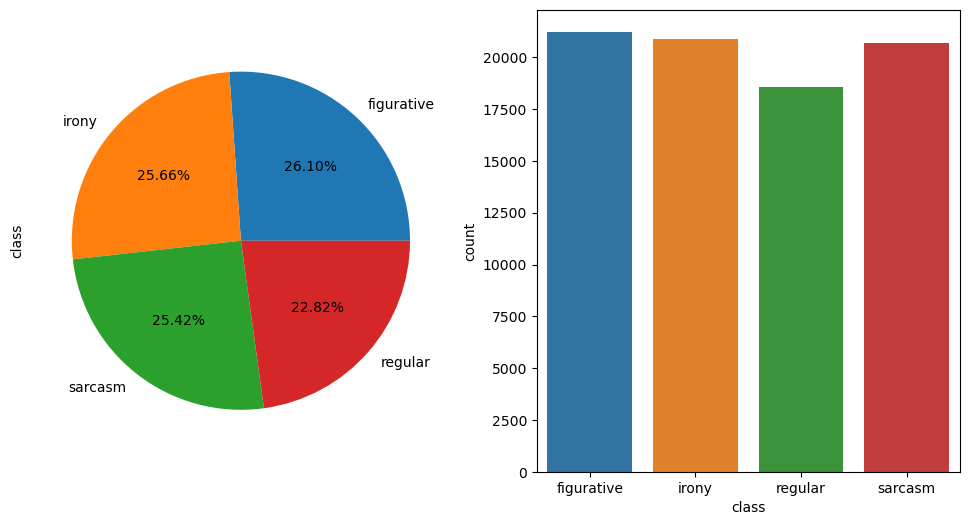

In [19]:
plt.rcParams['figure.figsize']=(12,6)
[plt.subplot(1,2,1),df["class"].value_counts().plot(kind ='pie',autopct = '%0.2f%%') ]
[plt.subplot(1,2,2),sns.countplot(data=df,x='class')]
plt.show()

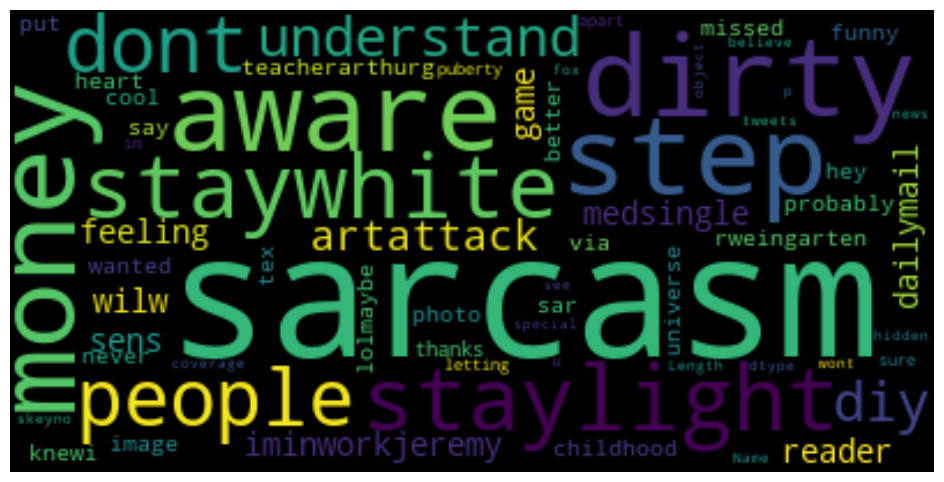

In [20]:
wc = WordCloud(stopwords=STOPWORDS,
    background_color='black', mode='RGB').generate(str(df["tweets"]))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [21]:
figurative = df[df['class']=='figurative']
irony = df[df['class']=='irony']
sarcasm = df[df['class']=='sarcasm']
regular = df[df['class']=='regular']

In [22]:
def wordcl(data,title):
    stop = STOPWORDS
    wc = WordCloud(background_color='black',stopwords=stop).generate(data)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title)

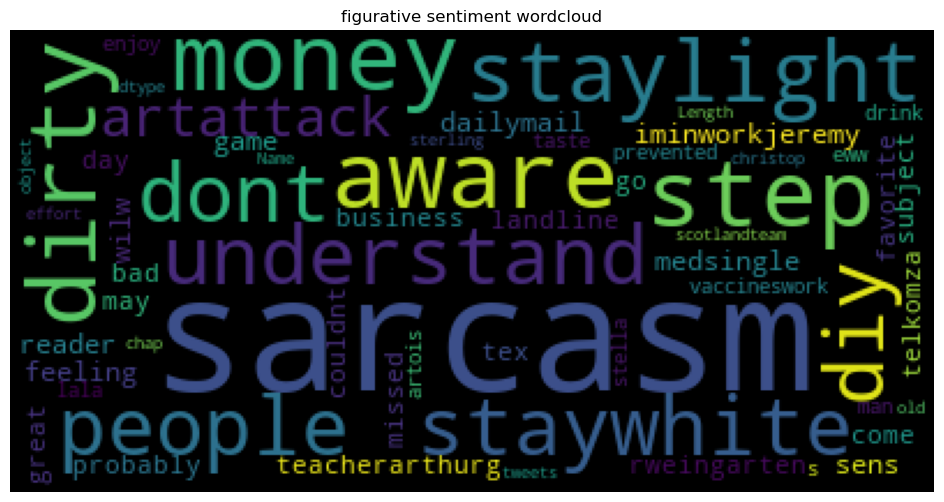

In [23]:
wordcl(str(figurative['tweets']),'figurative sentiment wordcloud')

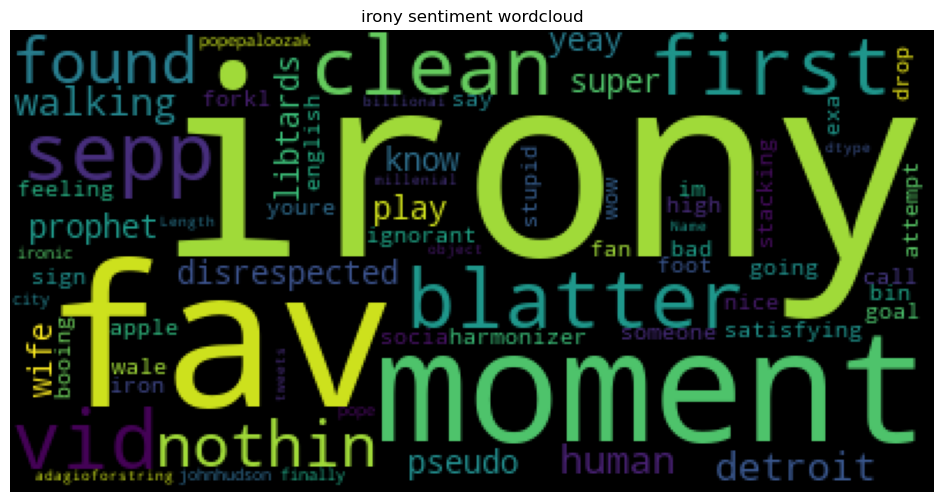

In [24]:
wordcl(str(irony['tweets']),'irony sentiment wordcloud')

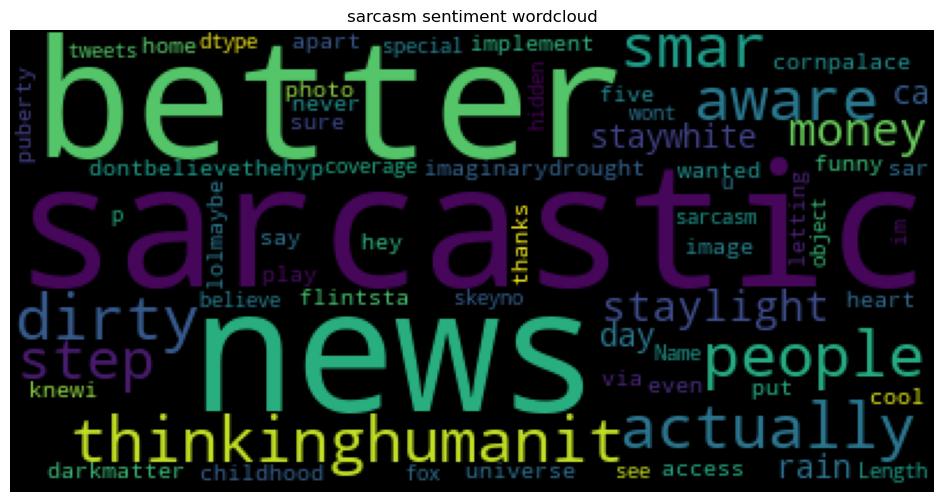

In [25]:
wordcl(str(sarcasm['tweets']),'sarcasm sentiment wordcloud')

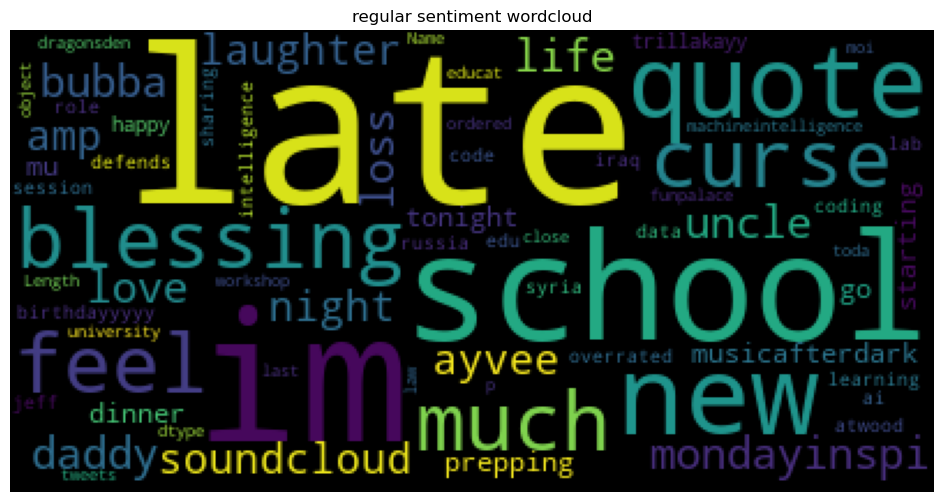

In [26]:
wordcl(str(regular['tweets']),'regular sentiment wordcloud')

In [27]:
#No. of words
df['length'] = df['tweets'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df

,tweets,class,length
0,aware dirty step get money staylight staywhite...,figurative,9
1,sarcasm people dont understand diy artattack,figurative,6
2,iminworkjeremy medsingle dailymail reader sens...,figurative,11
3,wilw get feeling like game sarcasm,figurative,6
4,teacherarthurg rweingarten probably missed tex...,figurative,6
...,...,...,...
81403,photo image via heart childhood cool funny sar...,sarcasm,8
81404,never knewi better put universe lolmaybe there...,sarcasm,13
81405,hey wanted say thanks puberty letting apart it...,sarcasm,15
81406,im sure coverage like fox news special hidden ...,sarcasm,13


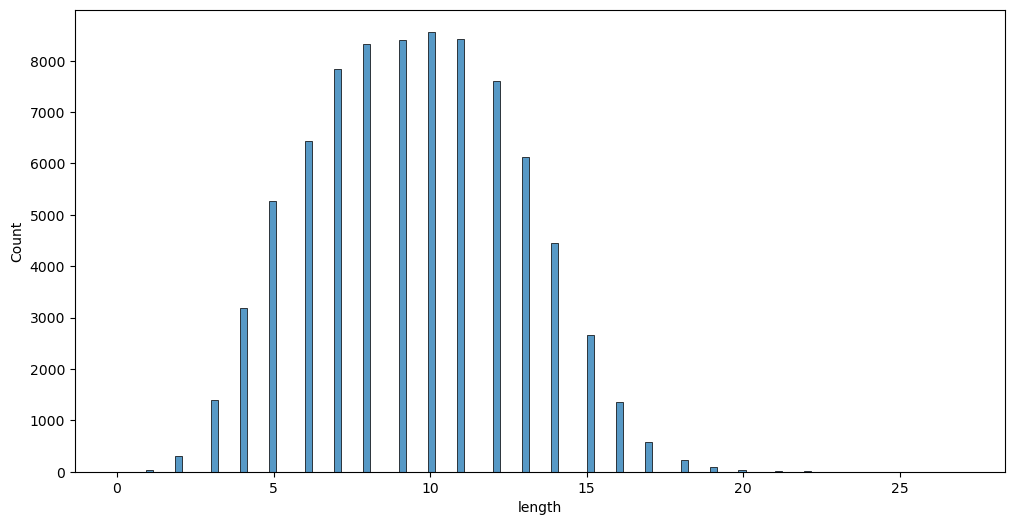

In [29]:
sns.histplot(df['length'])
plt.show()

this way of analysis is not showing any proper result.

In [30]:
df['lable'] = df['class'].map({'figurative':3,'irony':2,'sarcasm':1,'regular':0})

In [31]:
df

,tweets,class,length,lable
0,aware dirty step get money staylight staywhite...,figurative,9,3
1,sarcasm people dont understand diy artattack,figurative,6,3
2,iminworkjeremy medsingle dailymail reader sens...,figurative,11,3
3,wilw get feeling like game sarcasm,figurative,6,3
4,teacherarthurg rweingarten probably missed tex...,figurative,6,3
...,...,...,...,...
81403,photo image via heart childhood cool funny sar...,sarcasm,8,1
81404,never knewi better put universe lolmaybe there...,sarcasm,13,1
81405,hey wanted say thanks puberty letting apart it...,sarcasm,15,1
81406,im sure coverage like fox news special hidden ...,sarcasm,13,1


# Model Building

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from nltk.tokenize import word_tokenize
from sklearn.model_selection import GridSearchCV, KFold
from gensim.models import Word2Vec
from sklearn.svm import SVC

# Taking sample data

In [44]:
min_sample = 1000

df_figurative = df[df['class']=="figurative"].sample(min_sample,random_state=42)
df_irony = df[df['class']=="irony"].sample(min_sample,random_state=42)
df_regular = df[df['class']=="regular"].sample(min_sample,random_state=42)
df_sarcasm = df[df['class']=="sarcasm"].sample(min_sample,random_state=42)

In [56]:
df_balence = pd.concat([df_figurative,df_irony,df_regular,df_sarcasm],axis = 0)
df_balence['class'].value_counts()

figurative    1000
irony         1000
regular       1000
sarcasm       1000
Name: class, dtype: int64

In [57]:
X = df_balence['tweets']
Y = df_balence['lable']

# TF-IDF Uni-gram

In [59]:
def predict(model):
    model = model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    trainac = model.score(xtrain, ytrain)
    testac = model.score(xtest, ytest)
    
    print(f"Train accuracy {trainac}\nTest accuracy {testac}")
    
    print(classification_report(ytest, ypred))

In [94]:
tf =  TfidfVectorizer(ngram_range=(1,1))
x = tf.fit_transform(df_balence['tweets'])

#x = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
y = df_balence['lable']

In [95]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [96]:
predict(AdaBoostClassifier())

Train accuracy 0.37785714285714284
Test accuracy 0.3908333333333333
              precision    recall  f1-score   support

           0       0.40      1.00      0.57       303
           1       0.64      0.06      0.12       281
           2       0.00      0.00      0.00       309
           3       0.36      0.48      0.41       307

    accuracy                           0.39      1200
   macro avg       0.35      0.39      0.27      1200
weighted avg       0.34      0.39      0.28      1200



In [97]:
predict(GradientBoostingClassifier())

Train accuracy 0.8417857142857142
Test accuracy 0.7291666666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       303
           1       0.64      0.95      0.76       281
           2       0.67      0.93      0.78       309
           3       0.34      0.06      0.10       307

    accuracy                           0.73      1200
   macro avg       0.66      0.73      0.66      1200
weighted avg       0.66      0.73      0.66      1200



In [98]:
predict(DecisionTreeClassifier())

Train accuracy 0.9957142857142857
Test accuracy 0.6791666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       303
           1       0.64      0.76      0.69       281
           2       0.66      0.76      0.70       309
           3       0.31      0.21      0.25       307

    accuracy                           0.68      1200
   macro avg       0.65      0.68      0.66      1200
weighted avg       0.65      0.68      0.66      1200



In [99]:
predict(RandomForestClassifier())

Train accuracy 0.9957142857142857
Test accuracy 0.73
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       303
           1       0.64      0.97      0.77       281
           2       0.67      0.97      0.79       309
           3       0.12      0.01      0.01       307

    accuracy                           0.73      1200
   macro avg       0.60      0.74      0.64      1200
weighted avg       0.60      0.73      0.64      1200



In [100]:
predict(SVC())

Train accuracy 0.9910714285714286
Test accuracy 0.7341666666666666
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       303
           1       0.63      0.96      0.76       281
           2       0.67      0.98      0.80       309
           3       0.28      0.02      0.03       307

    accuracy                           0.73      1200
   macro avg       0.64      0.74      0.65      1200
weighted avg       0.64      0.73      0.64      1200



In [101]:
predict(MultinomialNB())

Train accuracy 0.9771428571428571
Test accuracy 0.6233333333333333
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       303
           1       0.60      0.73      0.66       281
           2       0.64      0.56      0.60       309
           3       0.32      0.31      0.32       307

    accuracy                           0.62      1200
   macro avg       0.63      0.63      0.62      1200
weighted avg       0.63      0.62      0.62      1200



# CountVectorizer Uni-Gram

In [84]:
vc =  CountVectorizer(ngram_range=(1,1))
X = vc.fit_transform(df_balence['tweets'])

#x = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
Y = df_balence['lable']

In [85]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=1)

In [86]:
predict(AdaBoostClassifier())

Train accuracy 0.37785714285714284
Test accuracy 0.3908333333333333
              precision    recall  f1-score   support

           0       0.40      1.00      0.57       303
           1       0.64      0.06      0.12       281
           2       0.00      0.00      0.00       309
           3       0.36      0.48      0.41       307

    accuracy                           0.39      1200
   macro avg       0.35      0.39      0.27      1200
weighted avg       0.34      0.39      0.28      1200



In [87]:
predict(GradientBoostingClassifier())

Train accuracy 0.8167857142857143
Test accuracy 0.7333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       303
           1       0.64      0.96      0.77       281
           2       0.67      0.95      0.79       309
           3       0.34      0.04      0.08       307

    accuracy                           0.73      1200
   macro avg       0.66      0.74      0.66      1200
weighted avg       0.66      0.73      0.65      1200



In [88]:
predict(DecisionTreeClassifier())

Train accuracy 0.9957142857142857
Test accuracy 0.6925
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       303
           1       0.62      0.76      0.68       281
           2       0.69      0.80      0.74       309
           3       0.34      0.21      0.26       307

    accuracy                           0.69      1200
   macro avg       0.66      0.69      0.67      1200
weighted avg       0.66      0.69      0.67      1200



In [89]:
predict(RandomForestClassifier())

Train accuracy 0.9957142857142857
Test accuracy 0.7308333333333333
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       303
           1       0.64      0.96      0.77       281
           2       0.68      0.97      0.80       309
           3       0.29      0.01      0.02       307

    accuracy                           0.73      1200
   macro avg       0.64      0.74      0.64      1200
weighted avg       0.64      0.73      0.64      1200



In [90]:
predict(SVC())

Train accuracy 0.9260714285714285
Test accuracy 0.74
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       303
           1       0.64      0.99      0.78       281
           2       0.67      0.99      0.80       309
           3       0.20      0.00      0.01       307

    accuracy                           0.74      1200
   macro avg       0.63      0.75      0.65      1200
weighted avg       0.62      0.74      0.64      1200



In [91]:
predict(MultinomialNB())

Train accuracy 0.9667857142857142
Test accuracy 0.6516666666666666
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       303
           1       0.63      0.77      0.69       281
           2       0.65      0.62      0.64       309
           3       0.32      0.29      0.31       307

    accuracy                           0.65      1200
   macro avg       0.65      0.66      0.65      1200
weighted avg       0.65      0.65      0.65      1200

